<div align="right">
<table style="width:50%">
  <tr>
    <th>Hazırlayan</th>
    <th>Versiyon</th> 
    <th>Tarih</th> 
    <th>Dil</th>
  </tr>
  <tr>
    <td>dataFLOYD</td>
    <td>v1.00</td> 
    <td>16 Eyl 2018</td>
    <td>TR </td>
  </tr>
</table>
</div>

<h1>İçindekiler<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Veri-akışı-(data-flow)-grafiği-ve-tensör-ne-demek?" data-toc-modified-id="Veri-akışı-(data-flow)-grafiği-ve-tensör-ne-demek?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Veri akışı (data flow) grafiği ve tensör ne demek?</a></span></li><li><span><a href="#Grafiği-kodlayalım" data-toc-modified-id="Grafiği-kodlayalım-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Grafiği kodlayalım</a></span></li><li><span><a href="#Session-(Oturum)-oluşturma-ve-grafiğin-koşturulması" data-toc-modified-id="Session-(Oturum)-oluşturma-ve-grafiğin-koşturulması-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Session (Oturum) oluşturma ve grafiğin koşturulması</a></span></li></ul></div>

# Derin Öğrenme - Tensorflow Kütüphanesini Tanıyalım
Derin öğrenme için kullanılabilecek en başta gelen kütüphanelerden birisi Tensorflow'dur. Tensorflow'un arkasında Google gibi dev bir şirket olduğu için bu kütüphane uzun yıllar bu alanda liderliğini sürdürecek gibi görünüyor. Bu yüzden eğer derin öğrenme konusunda ilginiz varsa, hatta bu alanda bir kariyer yapmak istiyorsanız bu kütüphanenin neler yapabileceğini ve arkaplanda nasıl işlediğini bilmeniz de fayda var. 

Tensorflow aslında çok daha geniş bir problem alanına hitap eden bir eden bir kütüphanedir. Temelde tensorflow "dataflow" programlama yapan sembolik bir matematik kütüphanesidir. Çok boyutlu matris operasyonlarını CPU ve GPU üzerinde çok hızlı bir şekilde yapabilecek şekilde tasarlanmıştır. Ayrıca tasarımı gerçekleştirilirken büyük veri setleri üzerinde, dağıtık bir şekilde çalışabilmesi hedeflenmiştir.

## Veri akışı (data flow) grafiği ve tensör ne demek?

Tensorflow kütüphanesinde her işlem bir grafik ile tanımlanmaktadır. Grafikteki düğümler işlemleri, bağlantılar ise veriyi yani tensörleri ifade etmektedir. Bağlantılar bazı durumlarda iki düğüm arasındaki etkileşimi de tanımlayabilirler. Örneğin hangi düğümün önce işlem yapacağı gibi. 

Konuyu daha iyi anlatabilmek için bir örnek yapalım. Mesela $y=2x+3$ denklemini ele alalım. Bu denklemi grafiksel olarak ele alacak olursak aşağıdaki gibi bir grafikle karşılaşırız.

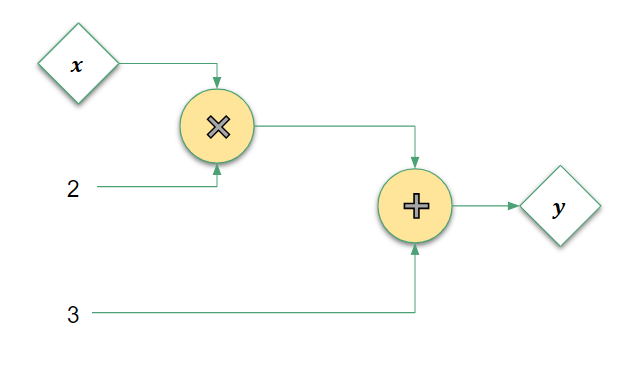
<p style="text-align: center"> <i>$y=2x+3$ denkleminin akış diyagramı olarak ifade edilmiş hali<i> </p>


Grafiği biraz analiz edelim, grafikte:
* iki adet değişken ($x$ ve $y$) mevcut
* İki adet sabit mevcut (2 ve 3)
* iki adet işlem mevcut (çarpma ve bölme)

## Grafiği kodlayalım

Şimdi buradaki olayı tensorflow kullanarak nasıl anlatacağımıza bakalım. İşe öncelikle kütüphaneyi ekleyerek başlıyoruz. 

In [2]:
import tensorflow as tf

Denklemde iki adet sabit mevcut, öncelikle bunları ekleyelim. Bunların isimleri a ve b olsun. Ayrıca bu sabitlerin ve diğer değişkenlerin veri tipini de `float32` şeklinde tanımlayalım

In [3]:
a = tf.constant(2,name="a",dtype=tf.float32)
b = tf.constant(3,name="b",dtype=tf.float32)

Şimdi değişkenleri yaratalım ve bu değişkenler arasındaki ilişkiyi tanımlayalım. $x$ değişkenini "placeholder" olarak tanımlayacağız. "Placeholder" grafiğe dışarıdan girdi sağlamak için kulllanılıyor.  

In [20]:
x = tf.placeholder(dtype=tf.float32,name="x")
y = tf.add(tf.multiply(a,x),b,name="y")

## Session (Oturum) oluşturma ve grafiğin koşturulması

Tensorflow dünyasında grafiği hazırlamak hemen sonuç alabileceğiniz anlamına gelmiyor :) Sonuç alabilmek için bir oturum başlatmalı ve koşturmalısınız.  

In [21]:
# Bu satırda sess isminde bir oturum yarattık
sess = tf.Session() 
# ardından y grafiğini x=5 olacak şekilde koşturduk
print(sess.run(y,feed_dict={x:5}))

13.0


Yukarıdaki örnekte girdiyi `feed_dict={x:5}` şeklinde sağladığımıza dikkat etmişsinizdir. Peki eğer buraya bir vektör verirsek ne olur sizce? 

In [22]:
# İki boyutlu bir vektörden iki boyutlu bir çıktı elde ettik
print(sess.run(y,feed_dict={x:[5,6]}))
# Bu kısım önemli oturumu kapatmayı unutmayın!
sess.close()

[13. 15.]


Gördüğünüz gibi iki boyutlu bir çıktı elde ettik. Sonunda başlattığımız oturumu `sess.close()` ile kapattık.

`x` değişkeni oluşturulurken `shape` parametresini açıkça belirlediğimiz de verdiğimiz girdi boyutu mutlaka beklenen girdi boyutu ile aynı olmalı, aksi takdirde hata ile karşılaşırız. Bu durumu da örneklendirelim.

In [26]:
x_1 = tf.placeholder(dtype=tf.float32,name="x_1",shape=1)
y_1 = tf.add(tf.multiply(a,x_1),b,name="y_1")
sess = tf.Session() 
print(sess.run(y_1,feed_dict={x_1:[1,2]}))
sess.close()

ValueError: Cannot feed value of shape (2,) for Tensor 'x_1_11:0', which has shape '(1,)'

1 boyutlu bir tensor bekleyen grafiğe 2 boyutlu tensor vererek hatamızı aldık ve rahatladık:) `ValueError: Cannot feed value of shape (2,) for Tensor 'x_1_11:0', which has shape '(1,)'`

Yukarıda bahsettiğimiz gibi her oturum sonunda mutlaka oturumu kapatmak gerekiyor. Çoğu zaman oturumu kapatmayı unutmayı engellemek adına `with` kalıbı kullanılarak bu kalıbın içinde tensorflow işlemleri yapılır. Yani aşağıdaki gibi bir kullanım oldukça sık karşılacaksınız.

In [27]:
with tf.Session() as sess:
    print(sess.run(y,feed_dict={x:[1,1,2,3,5,8]}))

[ 5.  5.  7.  9. 13. 19.]
